In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("loan_approved_dataset.csv")

In [3]:
df.head()

,age,income,balance,target
0,45.960570,63892.663213,NaN,0
1,38.340828,78641.249607,2924.633683,1
2,47.772262,29021.486393,2059.630370,0
3,58.276358,58444.538550,1353.063222,0
4,37.190160,40240.361463,2698.223314,0


In [6]:
df.shape

(500, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      490 non-null    float64
 1   income   490 non-null    float64
 2   balance  490 non-null    float64
 3   target   500 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.8 KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

age        10
income     10
balance    10
target      0
dtype: int64

<Axes: xlabel='age', ylabel='Count'>

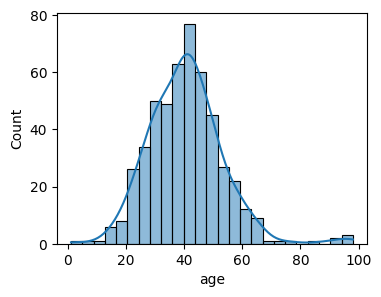

In [22]:
plt.figure(figsize=(4,3))
sns.histplot(df['age'], kde=True)

<Axes: ylabel='age'>

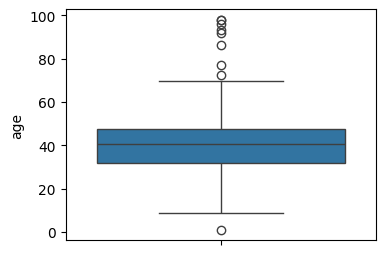

In [14]:
plt.figure(figsize=(4,3))
sns.boxplot(df['age'])

<Axes: xlabel='income', ylabel='Count'>

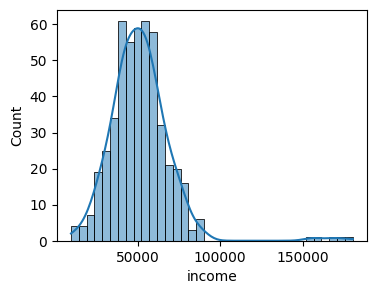

In [23]:
plt.figure(figsize=(4,3))
sns.histplot(df['income'], kde=True)

<Axes: ylabel='income'>

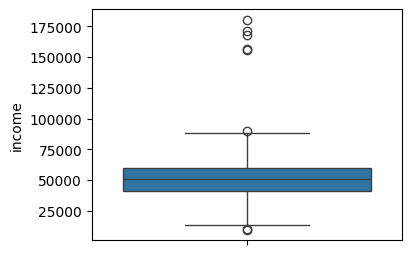

In [15]:
plt.figure(figsize=(4,3))
sns.boxplot(df['income'])

<Axes: xlabel='balance', ylabel='Count'>

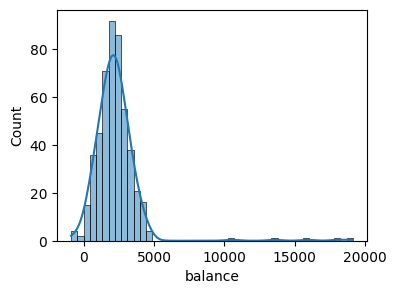

In [24]:
plt.figure(figsize=(4,3))
sns.histplot(df['balance'], kde=True)

<Axes: ylabel='balance'>

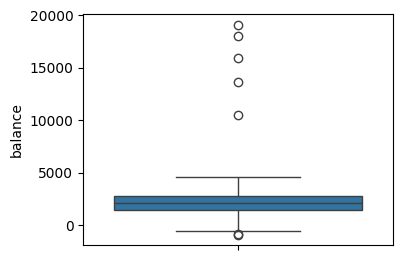

In [16]:
plt.figure(figsize=(4,3))
sns.boxplot(df['balance'])

In [19]:
#removing outlier
q1_a = df['age'].quantile(.25)
q3_a = df['age'].quantile(.75)

In [20]:
iqr_a = q3_a - q1_a

In [28]:
low_wh_a = q1_a - 1.5 * iqr_a
up_wh_a = q3_a + 1.5 * iqr_a

In [31]:
print(low_wh_a, up_wh_a)

8.311051112738998 71.12283596318306


In [29]:
df[df['age'] > up_wh_a]

,age,income,balance,target
79,98.000000,67156.310648,NaN,1
135,93.000000,25177.149922,2964.087168,1
179,72.642030,69073.326425,896.410683,0
209,86.232778,75446.845524,3749.576743,0
238,92.000000,74982.116667,2568.983079,0
297,96.000000,60222.510461,1709.725456,0
405,98.000000,50696.548222,1243.204911,0
478,76.946570,26241.457648,1112.507822,0


In [33]:
df[df['age'] < low_wh_a]

,age,income,balance,target
262,1.104792,88401.268074,2538.755992,0


In [34]:
def outlier(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    
    iqr = q3 - q1

    lower_wh = q1 - 1.5 * iqr
    upper_wh = q3 + 1.5 * iqr

    return df[(df[col] >= lower_wh) & (df[col] <= upper_wh)]

In [35]:
df = outlier(df, ['age', 'income', 'balance'])

<Axes: ylabel='age'>

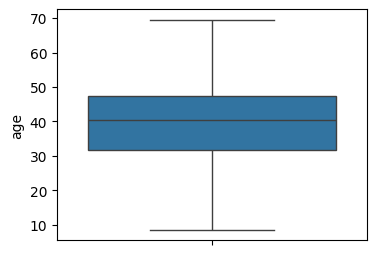

In [37]:
plt.figure(figsize=(4,3))
sns.boxplot(df['age'])

<Axes: ylabel='income'>

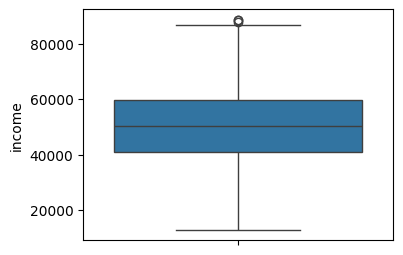

In [38]:
plt.figure(figsize=(4,3))
sns.boxplot(df['income'])

<Axes: ylabel='balance'>

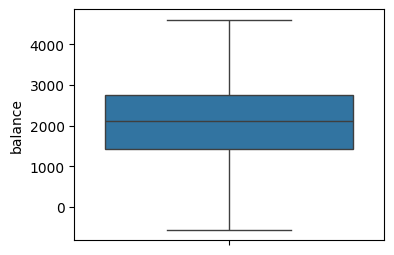

In [39]:
plt.figure(figsize=(4,3))
sns.boxplot(df['balance'])